#### ALFIDO TECH INTERNSHIP TASK NO 1 :

#  TITANIC SURVIVAL PREDICTION 

### Problem Statement 
 Titanic Survival Prediction is a classic data science project based on the Titanic dataset ,
 which contains information about passenger who were on board the Titanic,icluding whether they
 survived or not. The goal is to build predictive model that can predict whether a passenger would 
 have syrvived the Titanic disaster based on features like agr,gender,ticket class and many more  

### About Dataset
This dataset contains information about general information and detail of each passengers
Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target Name: A field rich in information as it contains title and family names 
Sex: male/female 
Age: Age, asignificant portion of values aremissing 
Sibsp: Number of siblings/spouses aboard 
Parch: Number of parents/children aboard 
Ticket: Ticket number. 
Fare: Passenger fare (British Pound). 
Cabin: Doesthe location of the cabin influence chances of survival? 
Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# importing all essencial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
# loading the dataset
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### EXPLORING THE DATSET

In [3]:
# return the number of column and rows of dataset
df.shape

(418, 12)

In [4]:
# return the first 5 numbers of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# return the last 5 numbers of dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# return an object with all of the columns header
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# return basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
# return basic statistics on numeric coluns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [9]:
# return different datatypes for each columns 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# return the all null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# Filled the missing value in Age column with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filled the missing value in Fare columns with median Value
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [13]:
df["Age"]=df["Age"].astype(int)

In [14]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [15]:
# drop unimportant columns
df.drop(columns=['PassengerId','Name','Cabin'],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 27.9+ KB


### DATA VISUALIZATION

[]

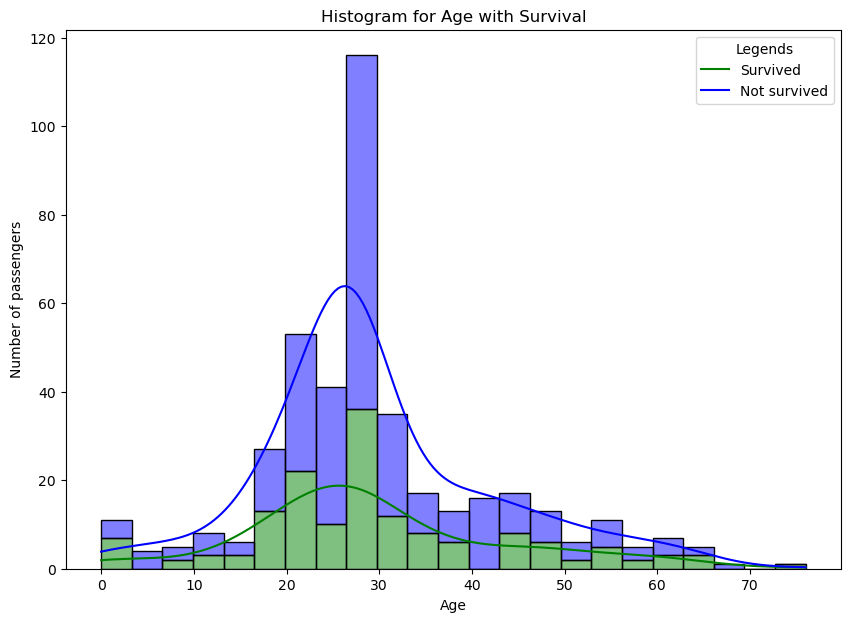

In [17]:
_, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data = df, x = "Age", hue = "Survived", multiple = "stack", kde = True, palette=["blue", "green"], ax = ax)
ax.set_title("Histogram for Age with Survival")
ax.set_xlabel("Age")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
plt.plot()

[]

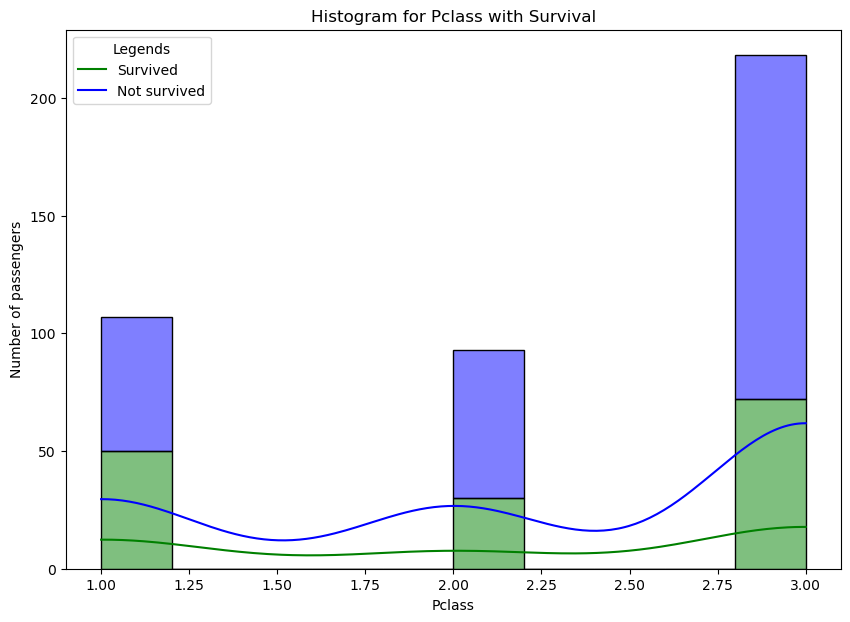

In [18]:
_, ax = plt.subplots(figsize = (10,7))
sns.histplot(data = df, x = "Pclass", hue = "Survived", multiple = "stack", kde = True, palette=["blue", "green"], ax = ax)
ax.set_title("Histogram for Pclass with Survival")
ax.set_xlabel("Pclass")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
plt.plot()

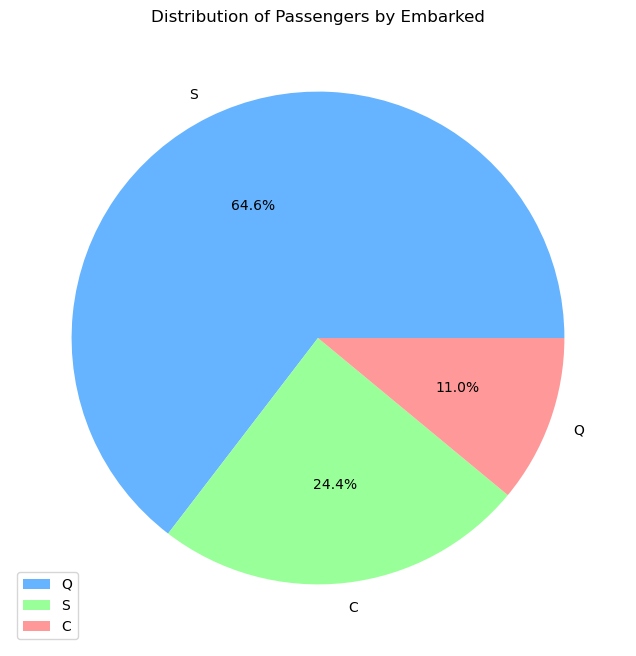

In [19]:
embarked_counts = df['Embarked'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'])
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

[]

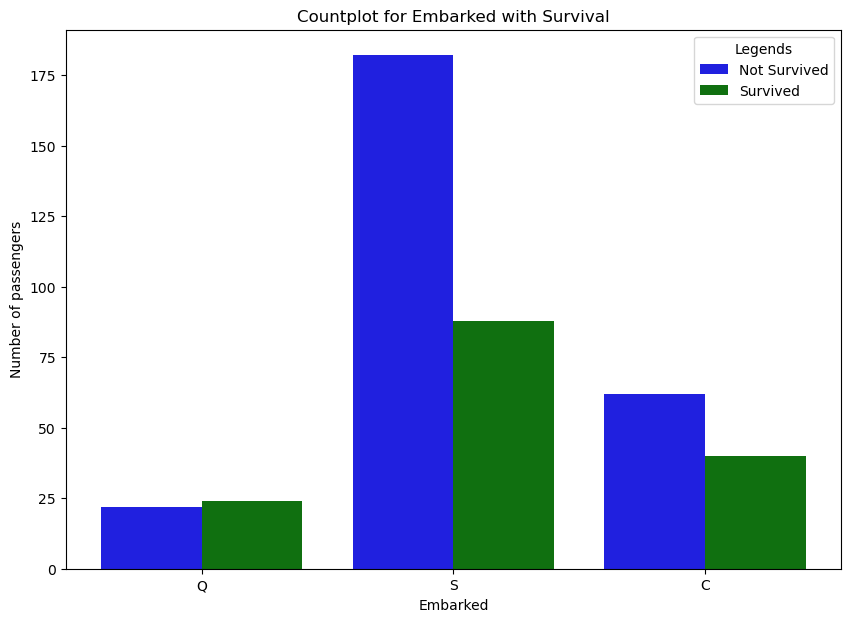

In [20]:
_, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data = df, x = "Embarked", hue = "Survived", palette=["blue", "green"], ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.plot()

[]

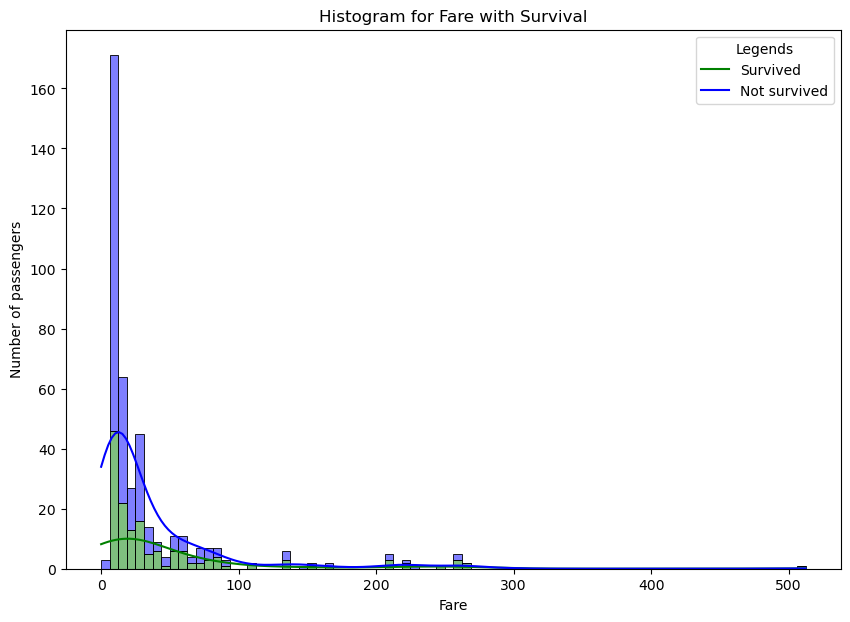

In [21]:
_, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data = df, x = "Fare", hue = "Survived", multiple = "stack", kde = True, palette = ["blue", "green"], ax = ax)
ax.set_title("Histogram for Fare with Survival")
ax.set_xlabel("Fare")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
plt.plot()

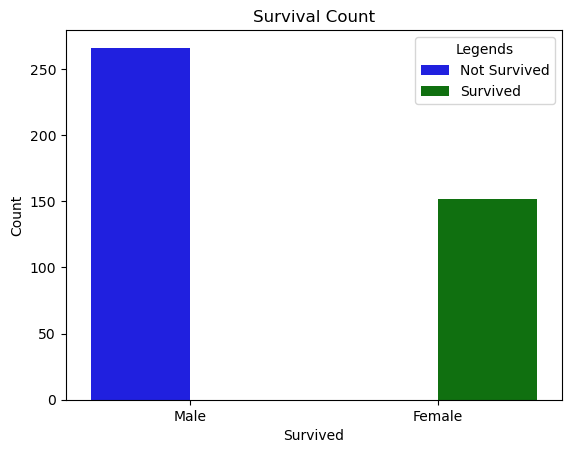

In [22]:
ax = sns.countplot(data = df, x="Survived", hue = "Survived", palette = ["blue", "green"])
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("Survival Count")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.xticks([0,1],["Male", "Female"])
plt.show()

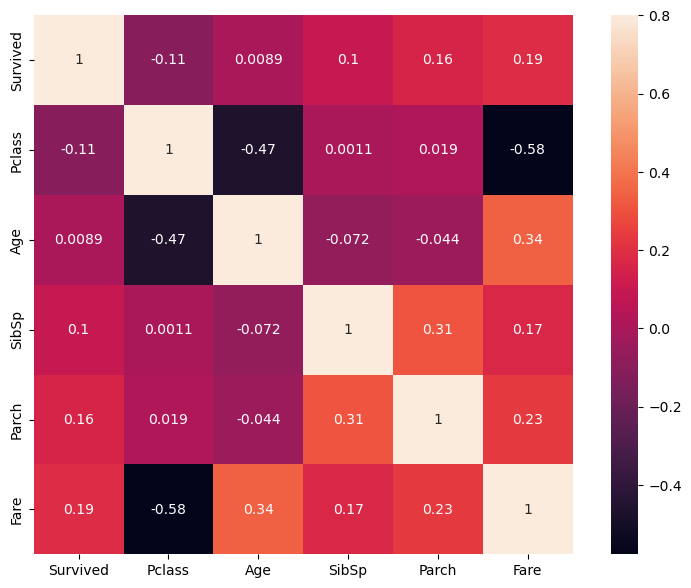

In [23]:
# Heatmap
corrmat = df.corr()
fig = plt.figure(figsize = (10, 7))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

### ENCODING

In [24]:
label_encoder = LabelEncoder()
# Apply Label Encoding to 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)

In [25]:
# Extract numeric part from 'Ticket' column using regular expressions
df['Ticket'] = df['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

### MODEL BUILDING

In [26]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34,0,0,330911,7.8292,0
1,3,0,47,1,0,363272,7.0000,1
2,2,1,62,0,0,240276,9.6875,0
3,3,1,27,0,0,315154,8.6625,1
4,3,0,22,1,1,3101298,12.2875,1


In [28]:
 # Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [29]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
292,3,1,27,0,0,2652,7.2292,2
392,3,1,13,0,2,2673,20.2500,1
142,1,1,61,1,3,17608,262.3750,2
155,3,1,24,0,0,752,7.5500,1
385,2,0,24,1,2,220845,65.0000,1
...,...,...,...,...,...,...,...,...
256,3,1,27,0,0,43130,7.7500,0
131,1,1,53,0,0,113780,28.5000,2
249,3,0,27,1,0,2660,14.4542,2
152,3,1,60,0,0,3701,14.4542,1


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=200)  # You can adjust max_iter as needed
}

In [32]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

F:\jupyternotebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\jupyternotebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\jupyternotebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        52
           1       0.00      0.00      0.00        32

    accuracy                           0.62        84
   macro avg       0.31      0.50      0.38        84
weighted avg       0.38      0.62      0.47        84


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy

F:\jupyternotebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\jupyternotebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\jupyternotebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\jupyternotebook\lib\site-packages\sklearn\neighbors\_classification.py

Neural Network - Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.31      0.41        52
           1       0.38      0.69      0.49        32

    accuracy                           0.45        84
   macro avg       0.50      0.50      0.45        84
weighted avg       0.53      0.45      0.44        84




### CONCLUSION

"Decision Tree" and "Random Forest" has the highest accuracy among the models.

### SAVE THE MODEL

In [34]:
import joblib

# Save the model to a file
joblib.dump(model, 'model_survival.pkl')


['model_survival.pkl']

In [35]:
# To load the model later
loaded_model = joblib.load('model_survival.pkl')